**Module Paths**

In [1]:
import os

os.chdir("../../")

# Putting everything together

Train the model and validate it against the validation set.

Let's start by defining a few hyperparameters

In [2]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
dropout = 0.5  # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = "sgd"  # optimizer. 'sgd' or 'adam'
weight_decay = 0.01  # regularization. Increase this to combat overfitting
momentum = 0.9

## Import necessary components

In [3]:
from cnn.landmark_classification.src.data import get_data_loaders
from cnn.landmark_classification.src.train import optimize, one_epoch_test
from cnn.landmark_classification.src.optimizer import get_optimizer, get_loss
from cnn.landmark_classification.src.model import MyModel

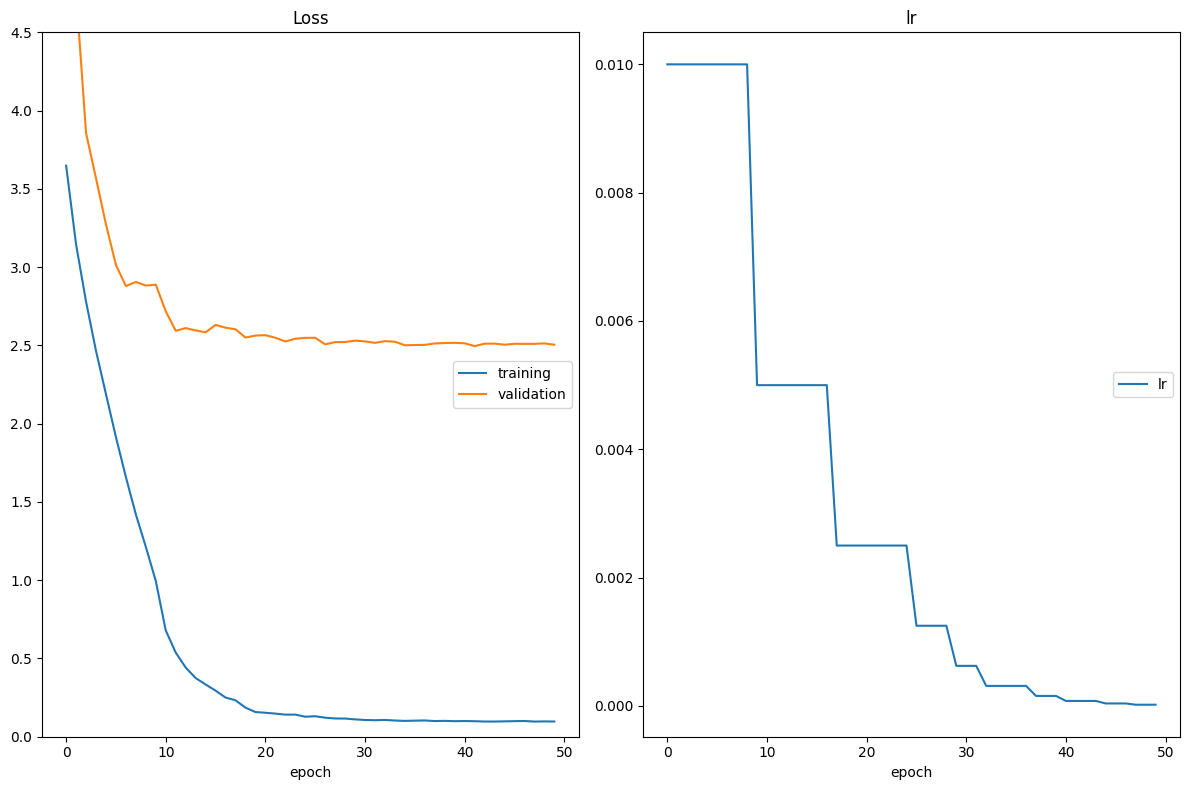

In [4]:
`# Set up data loaders using batch_size and valid_size defined above
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# Instantiate model with num_classes and dropout
model = MyModel(num_classes=num_classes, dropout=dropout)

# Get the optimizer with the specified model, learning rate, optimizer type, and weight decay
optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Get the loss function
loss = get_loss()

# Run the optimization process
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss.pt",
    interactive_tracking=True,
)

In [5]:
import torch

model = MyModel(num_classes=num_classes, dropout=dropout)

# Load the weights from the checkpoint
model.load_state_dict(torch.load("checkpoints/best_val_loss.pt", weights_only=True))

# device
from utils.device import get_device

device = get_device()
model = model.to(device)

# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.421202
Test Accuracy: 40.72%


2.4212023429870606

The lack of further improvement suggests a potential issue of the model plateauing or hitting a local minimum.

Few steps to further improve the validation performance:
- lowering the initial learning rate slightly
- slightly increasing the weight decay
- reducing drop out slightly to 0.3

Also, 
- adding early stopping to avoid unnecessary training

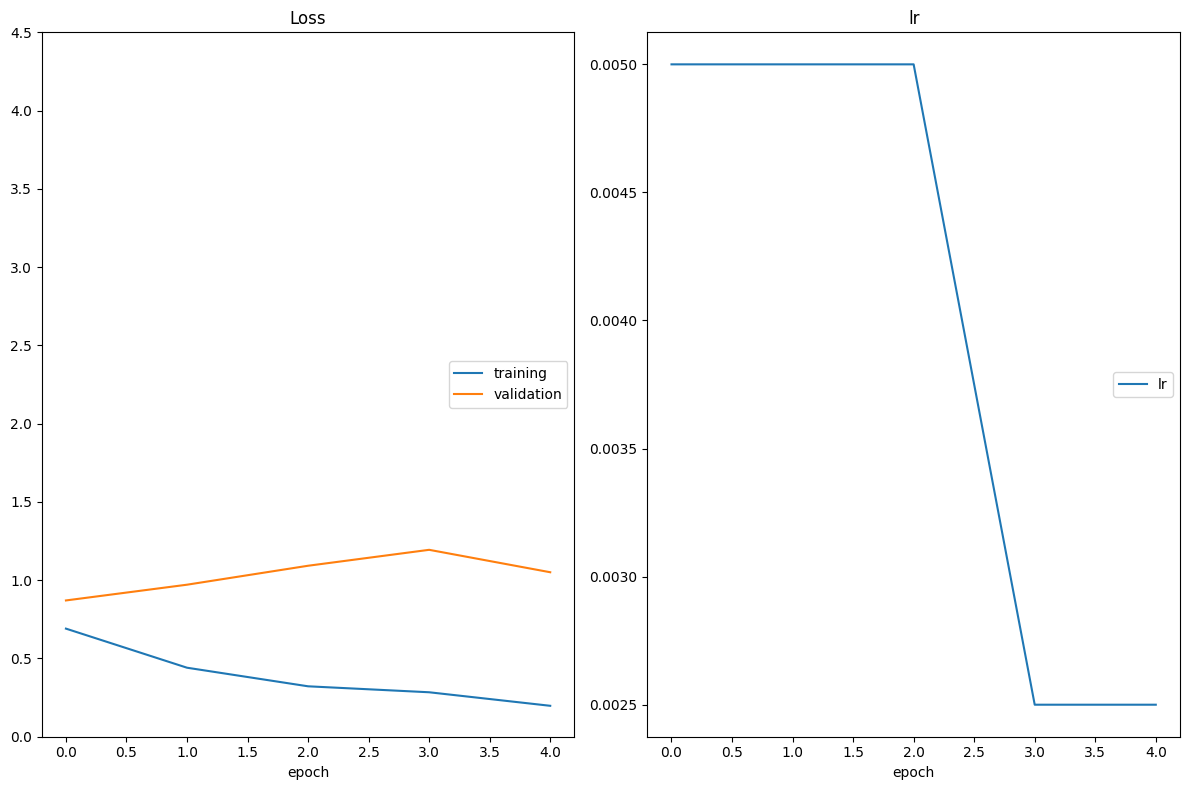

Epoch: 6 	Training Loss: 0.180982 	Validation Loss: 1.050364
No improvement for 5 epochs.
Early stopping triggered after 5 epochs of no improvement.


In [6]:
from cnn.landmark_classification.src.train import optimize

# Define the updated dropout rate
new_dropout = 0.3
num_epochs = 20
learning_rate = 0.005
weight_decay = 0.02

model = MyModel(num_classes=num_classes, dropout=new_dropout)
model.load_state_dict(torch.load("checkpoints/best_val_loss.pt", weights_only=True))

optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Continue training with the new dropout rate (added a early stopping condition in the backend)
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,  # Set the number of additional epochs
    save_path="checkpoints/best_val_loss_updated.pt",  # New checkpoint to save further improvements
    interactive_tracking=True,
)

In [7]:
model = MyModel(num_classes=num_classes, dropout=dropout)

# Load the weights from the checkpoint
model.load_state_dict(
    torch.load("checkpoints/best_val_loss_updated.pt", weights_only=True)
)

# device
from utils.device import get_device

device = get_device()
model = model.to(device)

# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.472513
Test Accuracy: 37.36%


2.4725128868103026

Using enhanced model with more dropout after each convolution layer

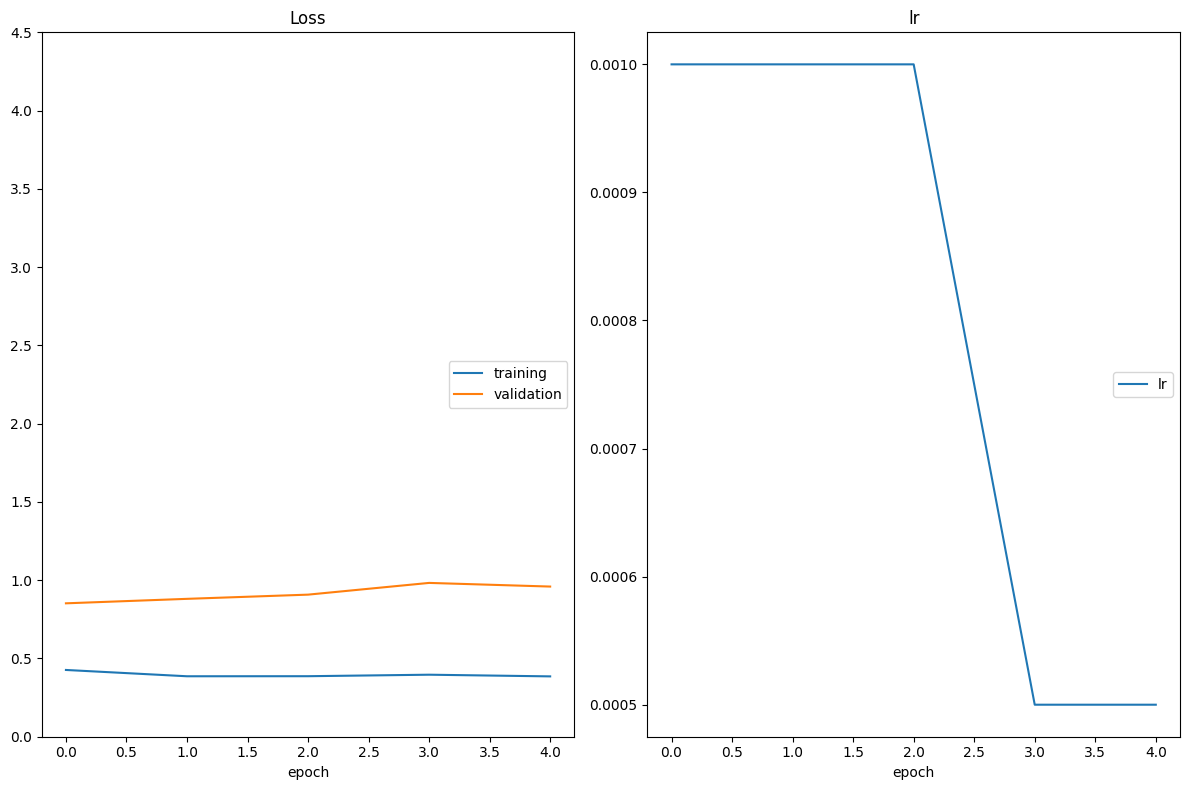

Epoch: 6 	Training Loss: 0.384546 	Validation Loss: 0.960302
No improvement for 5 epochs.
Early stopping triggered after 5 epochs of no improvement.


In [8]:
from cnn.landmark_classification.src.model import MyEnhancedModel

# Define updated hyperparameters
learning_rate = 0.001  # Lower learning rate for fine-tuning
weight_decay = 0.05  # Higher regularization


# Initialize the new model, optimizer, and training configuration
model = MyEnhancedModel(num_classes=num_classes, dropout=new_dropout)
model.load_state_dict(
    torch.load("checkpoints/best_val_loss_updated.pt", weights_only=True)
)  # Load previous weights
model.to(device)

optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Train with updated configuration
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss_updated.pt",
    interactive_tracking=True,
)

In [9]:
model = MyEnhancedModel(num_classes=num_classes, dropout=dropout)

# Load the weights from the checkpoint
model.load_state_dict(
    torch.load("checkpoints/best_val_loss_updated.pt", weights_only=True)
)
model = model.to(device)

# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.473432
Test Accuracy: 39.12%


2.4734316833496095

Training Enhanced Model from scratch

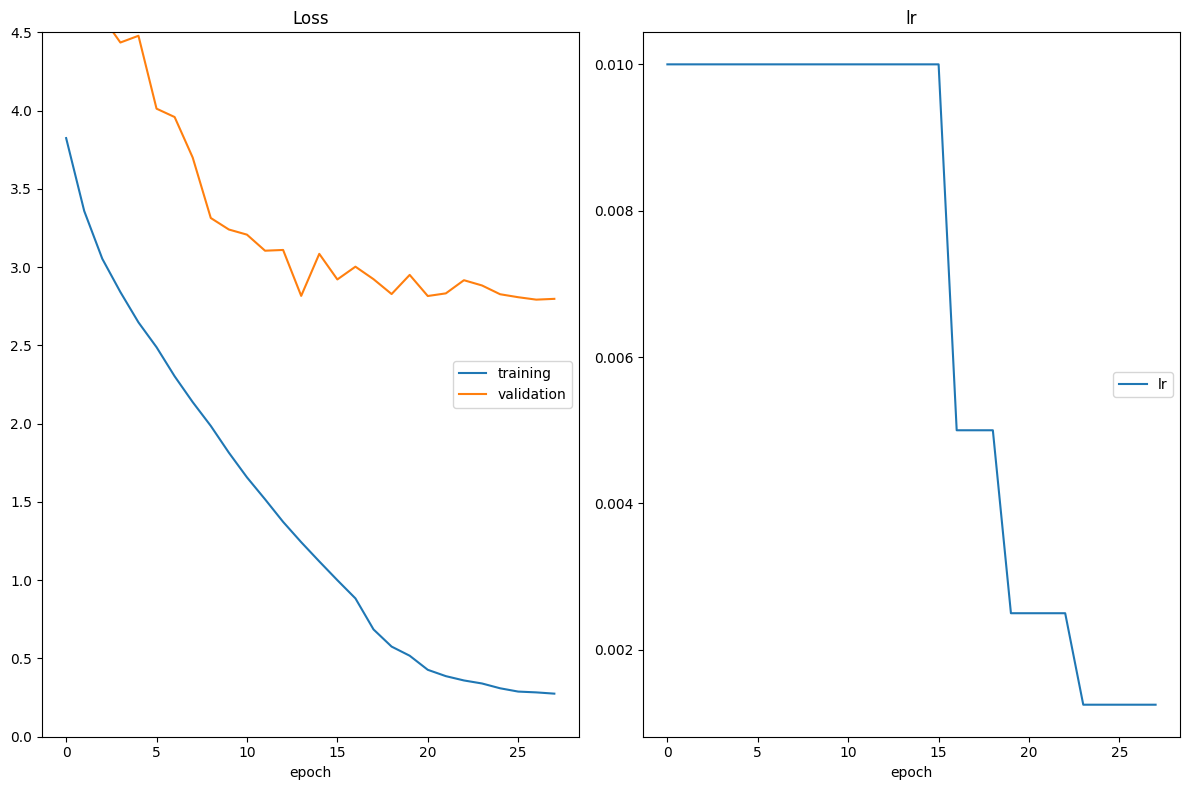

Epoch: 29 	Training Loss: 0.261519 	Validation Loss: 2.828684
No improvement for 15 epochs.
Early stopping triggered after 15 epochs of no improvement.


In [10]:
model = MyEnhancedModel(num_classes=num_classes, dropout=dropout)
learning_rate = 0.01

dropout = 0.5  # dropout for our model
weight_decay = 0.01  # regularization. Increase this to combat overfitting
num_epochs = 50


optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss_enhanced.pt",
    interactive_tracking=True,
    early_stopping_patience=15,
)

In [11]:
model = MyEnhancedModel(num_classes=num_classes, dropout=dropout)

# Load the weights from the checkpoint
model.load_state_dict(
    torch.load("checkpoints/best_val_loss_enhanced.pt", weights_only=True)
)
model = model.to(device)

# Run test
one_epoch_test(data_loaders["test"], model, loss)

Test Loss: 2.769658
Test Accuracy: 30.24%


2.7696580600738527